# Clustering point cloud data 
**Aim = cluster similar anatomies together to see if we can identify outliers**

In [11]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

#needed for reading in cloud data
import glob
from natsort import natsorted

In [ ]:
#load in data 
#read in cloud data - no aesthectics just geometry 

#intialise an empty matrix
data_matrix = np.empty((10*900,3*18000))
i = 0

#we want to go through each ".npy" file in order
for file in natsorted(glob.glob("../data:/training_data/mixed_samples/*.npy")):

    #make each file in sequence the next row of a matrix
    current_geometry = np.load(file)

    #10 rows for each file (10 timepoints)
    for j in range(0,10):

        #fill the current row of the matrix
        data_matrix[i] = current_geometry[j,:,0:3].flatten()

        #move to next row of the matrix
        i = i + 1

In [ ]:
#finding optimal k value using silhouette score and elbow method

array([-19.19090843,  17.49430275,   9.2532053 , ..., -15.19591618,
       -32.96632385,  55.38721085], shape=(54000,))

In [50]:
import matplotlib.cm as cm
#code edited from sklearn documentation
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for n_clusters in range_n_clusters:
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_matrix, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

   

For n_clusters = 2 The average silhouette_score is : 0.27400301769460406
For n_clusters = 3 The average silhouette_score is : 0.289835477301193
For n_clusters = 4 The average silhouette_score is : 0.20081209620606646
For n_clusters = 5 The average silhouette_score is : 0.20938191626917171
For n_clusters = 6 The average silhouette_score is : 0.18735915392315353
For n_clusters = 7 The average silhouette_score is : 0.1752490246038093
For n_clusters = 8 The average silhouette_score is : 0.15212432971150944
For n_clusters = 9 The average silhouette_score is : 0.15734441861610135
For n_clusters = 10 The average silhouette_score is : 0.15485178363757612
For n_clusters = 11 The average silhouette_score is : 0.14794752163824107
For n_clusters = 12 The average silhouette_score is : 0.14783374021585674
For n_clusters = 13 The average silhouette_score is : 0.15088299614588407
For n_clusters = 14 The average silhouette_score is : 0.15190443134310808
For n_clusters = 15 The average silhouette_score 

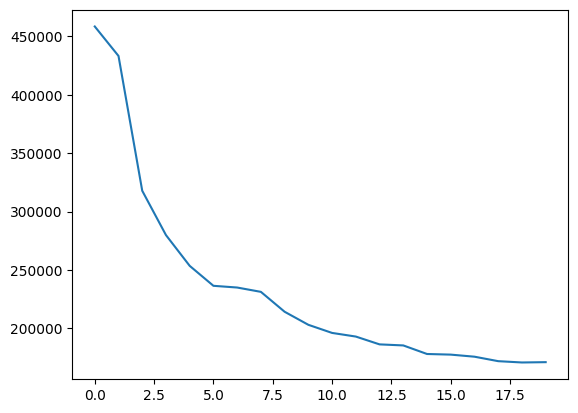

In [ ]:
# function returns WSS score for k values from 1 to kmax
# code adapted from https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

WSS_calculated = calculate_WSS(data_matrix, 20)

plt.figure()
plt.plot(WSS_calculated)
plt.xlabel("number of clusters")
plt.ylabel("WSS")
plt.title("Elbow method for optimal k")

In [16]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(data_matrix)
kmeans.fit(data_matrix)


KMeans(n_clusters=5, random_state=0)

In [17]:
kmeans.cluster_centers_

array([[-16.18945746,  12.6853872 ,   9.61433116, ..., -13.99233344,
        -36.46417661,  54.50140159],
       [-13.24602585,  14.43328735,   8.71538   , ..., -12.04147782,
        -30.67447207,  48.14556852],
       [-15.20717502,   7.11748256,   8.31803402, ..., -12.22951478,
        -38.69744832,  48.61253262],
       [ -1.18894238,  23.3881224 ,  20.86408357, ...,   0.7268322 ,
        -20.51787849,  60.76692151],
       [-12.22731198,   9.8418265 ,   8.470525  , ..., -10.55235913,
        -30.71145234,  42.87798819]], shape=(5, 54000))

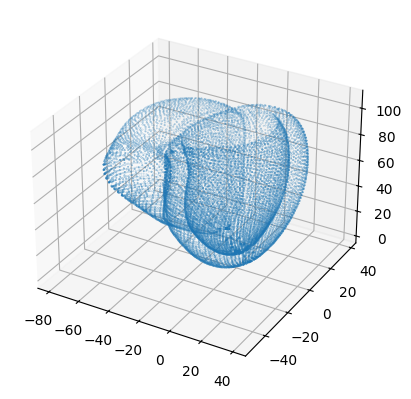

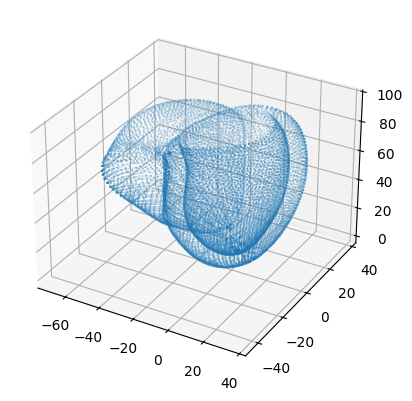

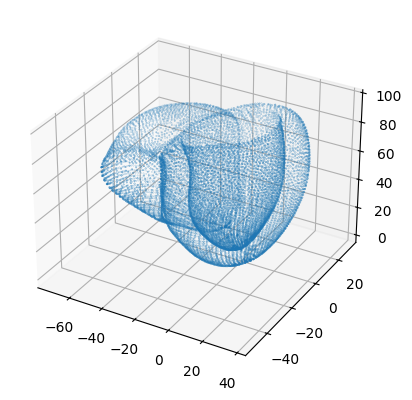

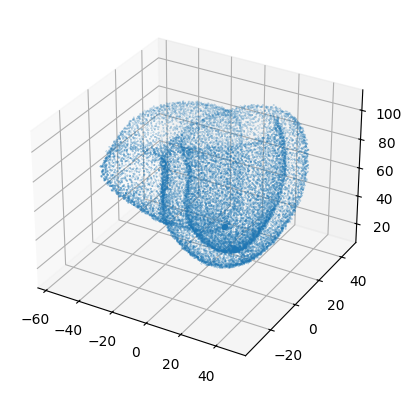

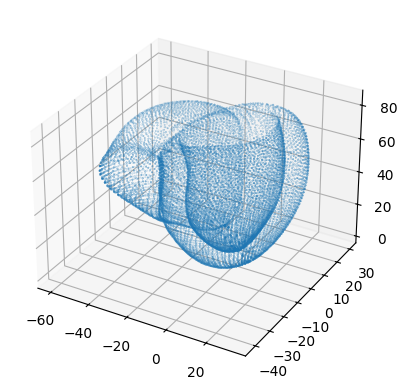

In [ ]:
#plotting the kmeans cluster centres
for i in range(0,5):
    geometry = kmeans.cluster_centers_[i].reshape(1,18000,3)
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    xs = geometry[0,:,0]
    ys = geometry[0,:,1]
    zs = geometry[0,:,2]
    #heart_part = geometry[0,:,3]

    ax.scatter3D(xs,ys,zs, s = 0.05)

Suspect that the clustering is clouded by the different anatomies that form as the heart contracts and moves

----

Now repeating but only for the first frame

In [22]:
#load in data 
#read in cloud data - no aesthectics just geometry 

#intialise an empty matrix
data_matrix_f1 = np.empty((900,3*18000))
i = 0

#we want to go through each ".npy" file in order
for file in natsorted(glob.glob("../data:/training_data/mixed_samples/*.npy")):

    #make each file in sequence the next row of a matrix
    current_geometry = np.load(file)

    #fill the current row of the matrix
    data_matrix_f1[i] = current_geometry[0,:,0:3].flatten()

    #move to next row of the matrix
    i = i + 1

In [44]:
#code edited from sklearn documentation
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for n_clusters in range_n_clusters:
    
   

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_matrix_f1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_matrix_f1, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

  

    



For n_clusters = 2 The average silhouette_score is : 0.24077115174846034
For n_clusters = 3 The average silhouette_score is : 0.2583266443750615
For n_clusters = 4 The average silhouette_score is : 0.23586252521610548
For n_clusters = 5 The average silhouette_score is : 0.1939840745725898
For n_clusters = 6 The average silhouette_score is : 0.18718313086137603
For n_clusters = 7 The average silhouette_score is : 0.1886065765766269
For n_clusters = 8 The average silhouette_score is : 0.17273699217269306
For n_clusters = 9 The average silhouette_score is : 0.17221064183028398
For n_clusters = 10 The average silhouette_score is : 0.16363327708177497
For n_clusters = 11 The average silhouette_score is : 0.15631471645337489
For n_clusters = 12 The average silhouette_score is : 0.15534575116842897
For n_clusters = 13 The average silhouette_score is : 0.16105433074543965
For n_clusters = 14 The average silhouette_score is : 0.16105985935704045
For n_clusters = 15 The average silhouette_score 

Text(0.5, 1.0, 'Elbow method for optimal k')

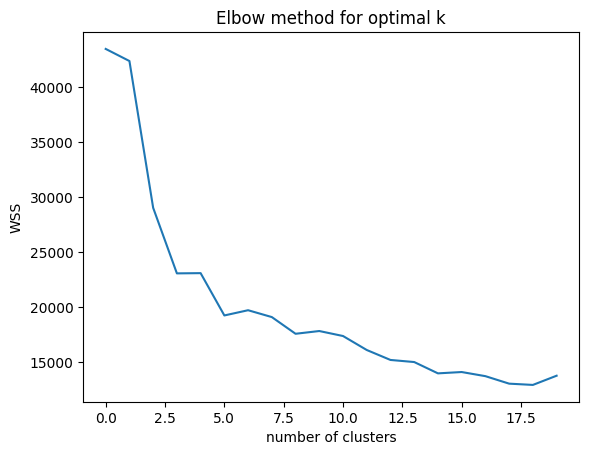

In [24]:
WSS_calculated = calculate_WSS(data_matrix_f1, 20)

plt.figure()
plt.plot(WSS_calculated)
plt.xlabel("number of clusters")
plt.ylabel("WSS")
plt.title("Elbow method for optimal k")

In [25]:
kmeans_f1 = KMeans(n_clusters=3, random_state=0).fit(data_matrix)
kmeans_f1.fit(data_matrix_f1)


KMeans(n_clusters=3, random_state=0)

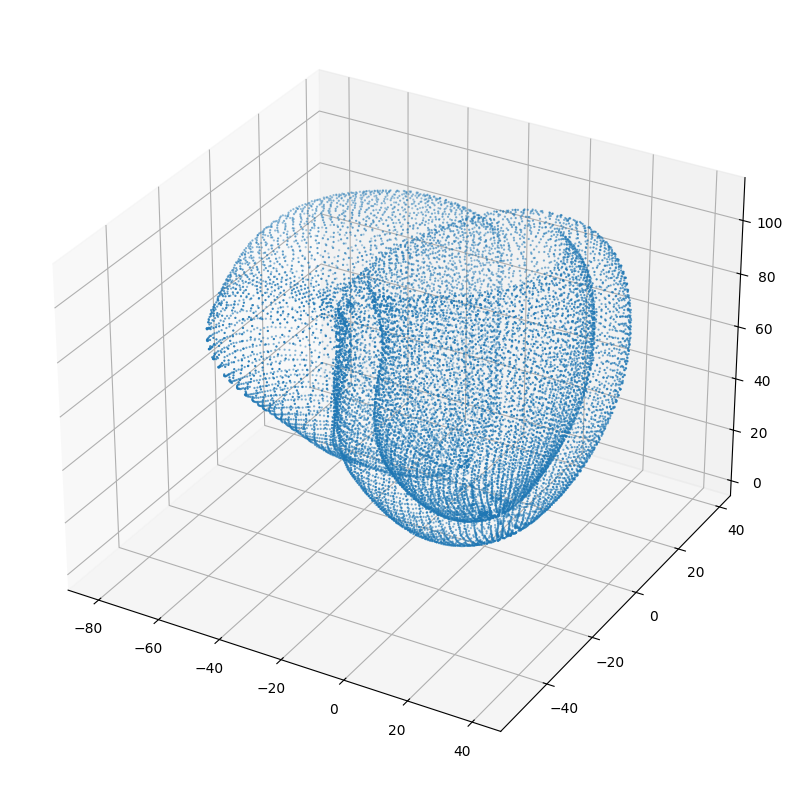

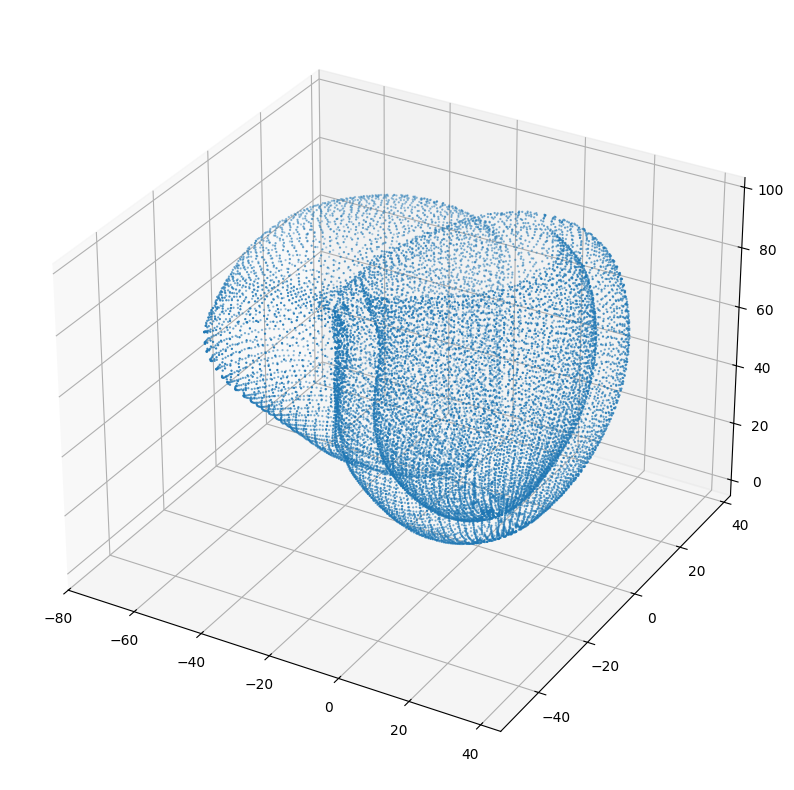

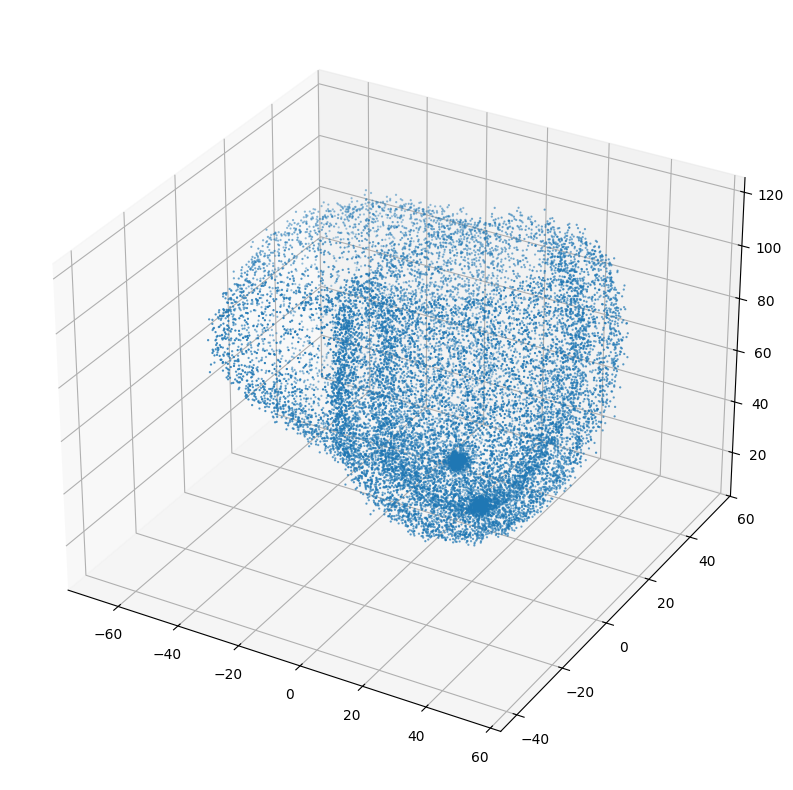

In [43]:
#plotting the kmeans cluster centres
for i in range(0,3):
    geometry = kmeans_f1.cluster_centers_[i].reshape(1,18000,3)
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')

    xs = geometry[0,:,0]
    ys = geometry[0,:,1]
    zs = geometry[0,:,2]
    #heart_part = geometry[0,:,3]

    ax.scatter3D(xs,ys,zs, s = 0.4)

**Investigating the cloud**

In [27]:
#finding out the size of the 'bad' cluster 
cluster_counts = np.bincount(kmeans_f1.labels_)
print(cluster_counts)

[417 445  38]


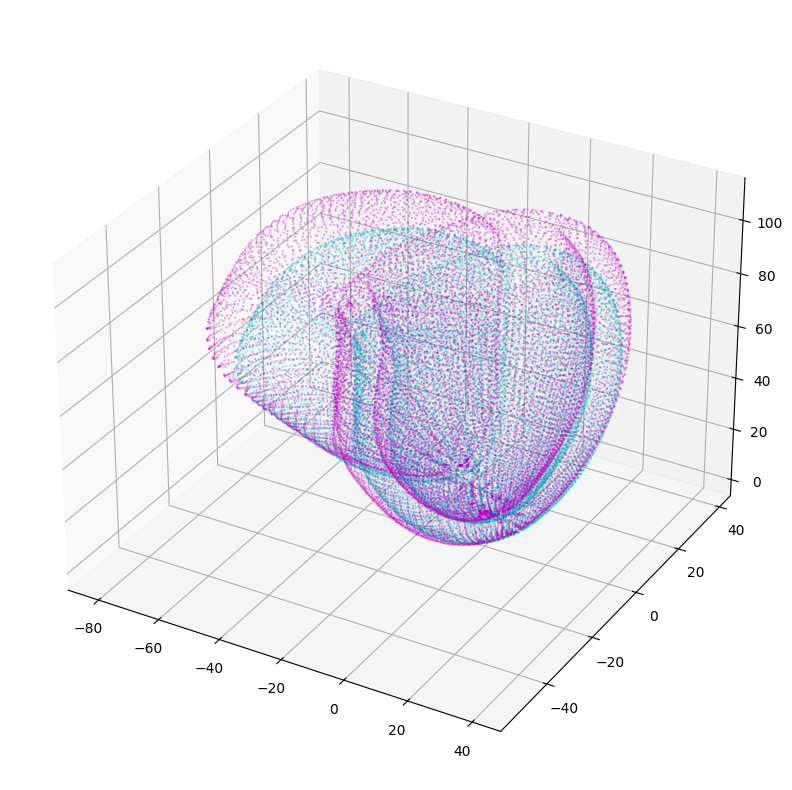

In [40]:
# what is the difference between cluster 1 and 2

cols = ['m','c']

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
#plotting the kmeans cluster centres
for i in range(0,2):
    geometry = kmeans_f1.cluster_centers_[i].reshape(1,18000,3)
    
    #ax = plt.axes(projection='3d')

    xs = geometry[0,:,0]
    ys = geometry[0,:,1]
    zs = geometry[0,:,2]
    #heart_part = geometry[0,:,3]

    ax.scatter3D(xs,ys,zs, s = 0.4, color = cols[i], alpha = 0.3)

In [42]:
#get the ID numbers of the anomolous datapoints 

anomalous_ids = np.where(kmeans_f1.labels_ == 2)[0]
print(anomalous_ids)

[ 57  75 113 138 139 172 174 289 292 308 326 335 378 385 400 424 426 439
 445 503 508 573 591 601 658 666 673 693 699 722 754 776 793 814 822 841
 846 875]


In [ ]:
# sense check - plot the anomalous datapoints
for idx in anomalous_ids:
    geometry = data_matrix_f1[idx].reshape(1,18000,3)
    fig = plt.figure(figsize=(5,5))
    ax = plt.axes(projection='3d')

    xs = geometry[0,:,0]
    ys = geometry[0,:,1]
    zs = geometry[0,:,2]
    #heart_part = geometry[0,:,3]

    ax.scatter3D(xs,ys,zs, s = 0.01, color = 'r')

"# sense check - plot the anomalous datapoints\nfor idx in anomalous_ids:\n    geometry = data_matrix_f1[idx].reshape(1,18000,3)\n    fig = plt.figure(figsize=(5,5))\n    ax = plt.axes(projection='3d')\n\n    xs = geometry[0,:,0]\n    ys = geometry[0,:,1]\n    zs = geometry[0,:,2]\n    #heart_part = geometry[0,:,3]\n\n    ax.scatter3D(xs,ys,zs, s = 0.01, color = 'r')"

In [51]:
#investigating gender split in clusters 
# read in data 
demographics = pd.read_csv('../data:/training_data/mixed_demographics.csv')
demographics.head()

Unnamed: 0       MI        age        BMI      height     weight  \
0           0  healthy  62.593012  25.312186  161.647749  64.949107   
1           1  healthy  58.037959  32.100795  172.543391  94.715477   
2           2      pMI  65.840496  26.099055  166.521430  71.650562   
3           3      pMI  68.518300  27.672836  166.176884  75.779414   
4           4  healthy  55.591381  27.266429  161.314821  70.185424   

   diastolic_BP  systolic_BP    sex  
0     76.057670   137.765801  False  
1     84.272113   143.459426  False  
2     75.340419   137.100866  False  
3     75.697258   140.518093   True  
4     79.973837   133.740780  False

In [53]:
demographics["sex"] = demographics["sex"].replace({True: "Male", False: "Female"})
demographics.head()

Unnamed: 0       MI        age        BMI      height     weight  \
0           0  healthy  62.593012  25.312186  161.647749  64.949107   
1           1  healthy  58.037959  32.100795  172.543391  94.715477   
2           2      pMI  65.840496  26.099055  166.521430  71.650562   
3           3      pMI  68.518300  27.672836  166.176884  75.779414   
4           4  healthy  55.591381  27.266429  161.314821  70.185424   

   diastolic_BP  systolic_BP     sex  
0     76.057670   137.765801  Female  
1     84.272113   143.459426  Female  
2     75.340419   137.100866  Female  
3     75.697258   140.518093    Male  
4     79.973837   133.740780  Female

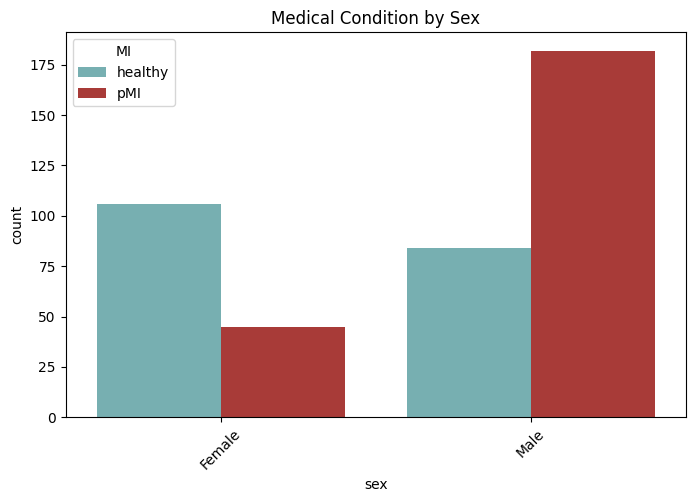

In [ ]:
cluster_1 = np.where(kmeans_f1.labels_ == 0)[0]
cluster_2 = np.where(kmeans_f1.labels_ == 1)[0]


plt.figure(figsize=(8,5))
sns.countplot(
    data=demographics.iloc[cluster_1],
    x='sex',
    hue='MI',
    palette = ['#6EB8BA', '#BB2A25']
)
plt.title('Medical Condition by Sex Cluster 1')
plt.xticks(rotation=45)
plt.show()


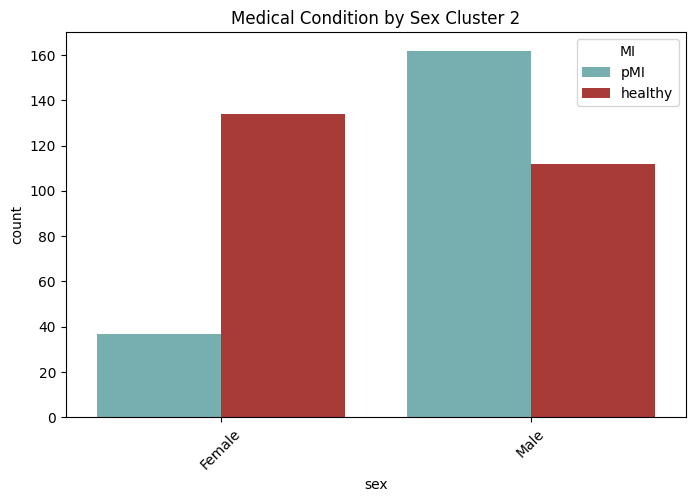

In [57]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=demographics.iloc[cluster_2],
    x='sex',
    hue='MI',
    palette = ['#6EB8BA', '#BB2A25']
)
plt.title('Medical Condition by Sex Cluster 2')
plt.xticks(rotation=45)
plt.show()

---

seeing if with 5 clusters can identify a split in disease and gender

In [54]:
kmeans_5 = KMeans(n_clusters=5, random_state=0).fit(data_matrix)
kmeans_5.fit(data_matrix_f1)

KMeans(n_clusters=5, random_state=0)

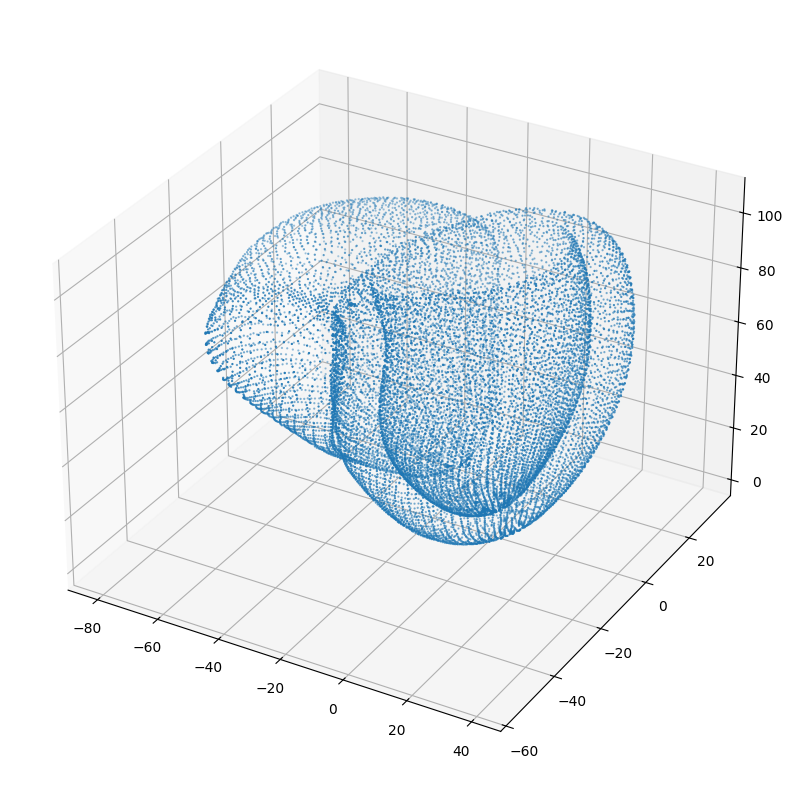

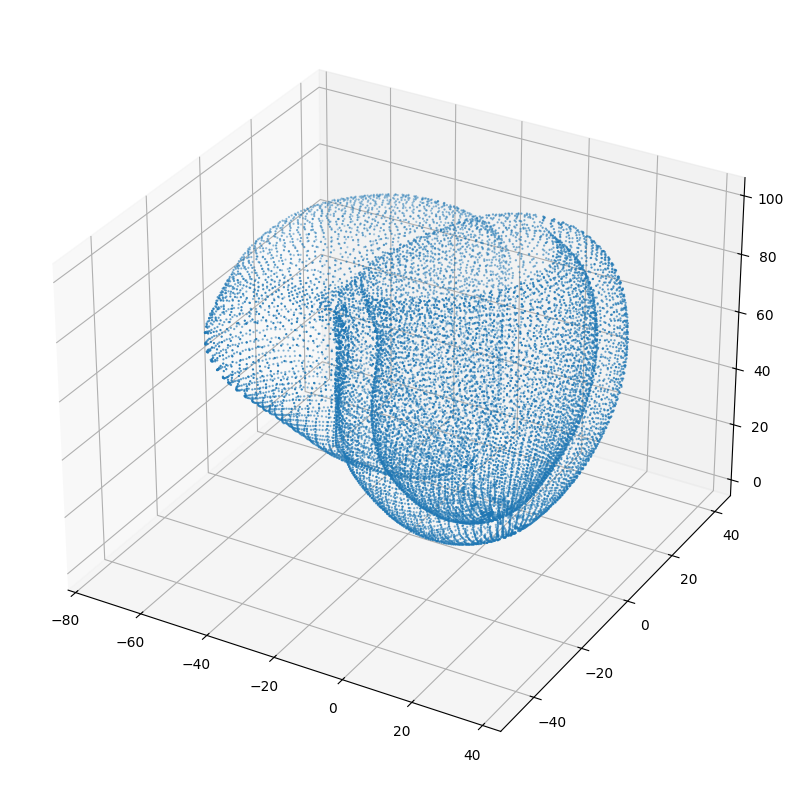

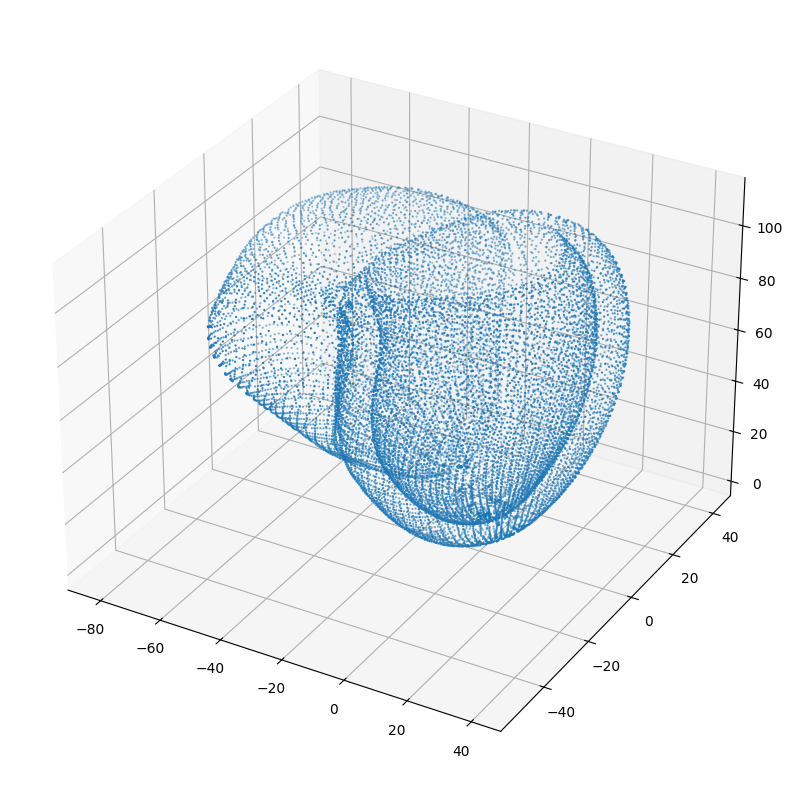

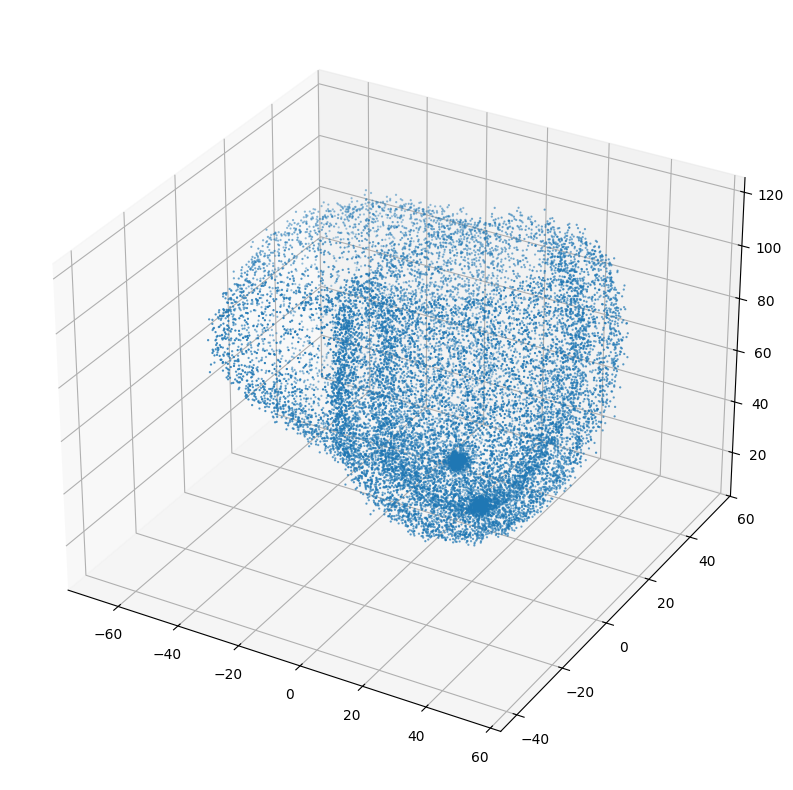

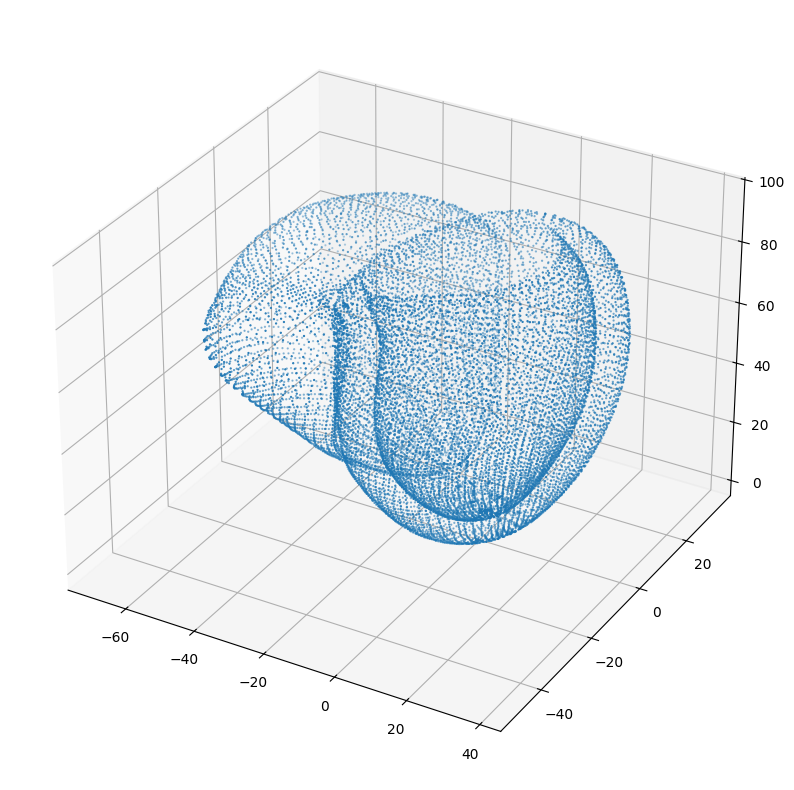

In [55]:
#plotting the kmeans cluster centres
for i in range(0,5):
    geometry = kmeans_5.cluster_centers_[i].reshape(1,18000,3)
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')

    xs = geometry[0,:,0]
    ys = geometry[0,:,1]
    zs = geometry[0,:,2]
    #heart_part = geometry[0,:,3]

    ax.scatter3D(xs,ys,zs, s = 0.4)

In [59]:
#finding out the size of the 'bad' cluster 
cluster_counts = np.bincount(kmeans_5.labels_)
print(cluster_counts)

[191 244 222  38 205]


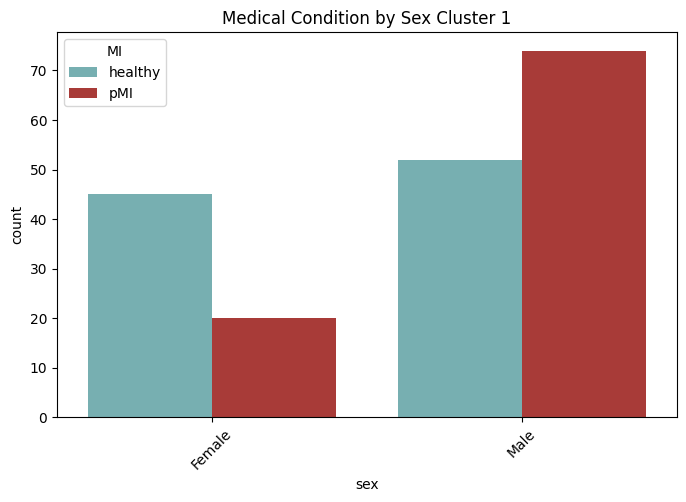

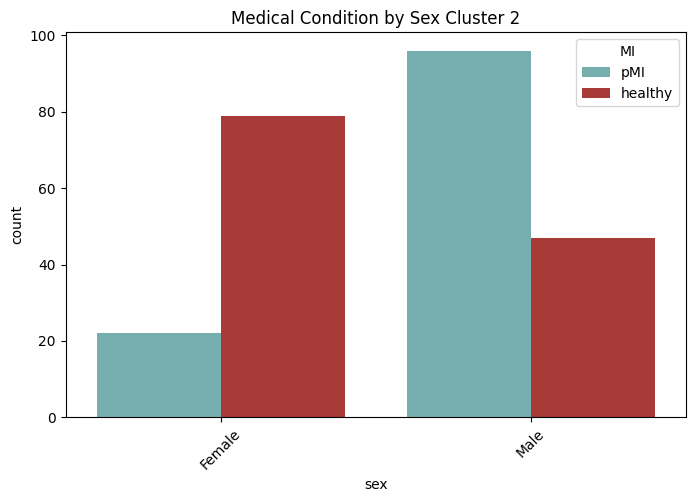

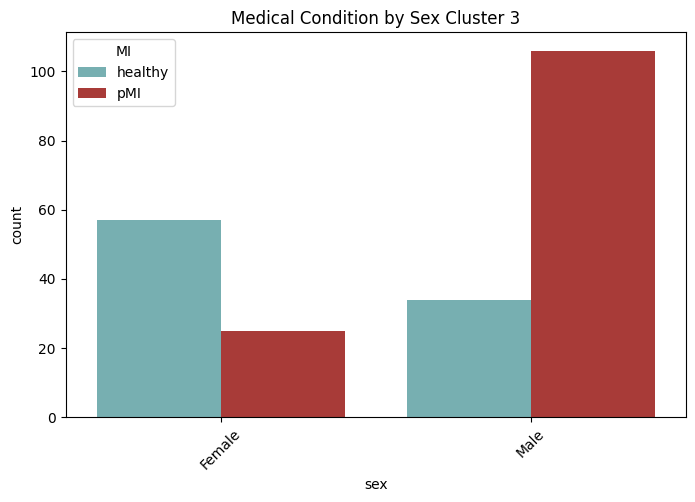

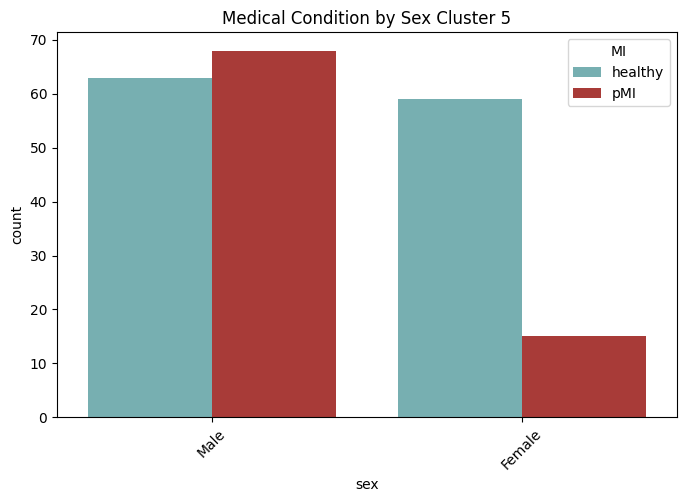

In [60]:
#here we find cluster 4 is the anomolous one
cluster_1 = np.where(kmeans_5.labels_ == 0)[0]
cluster_2 = np.where(kmeans_5.labels_ == 1)[0]
cluster_3 = np.where(kmeans_5.labels_ == 2)[0]
cluster_5 = np.where(kmeans_5.labels_ == 4)[0]



plt.figure(figsize=(8,5))
sns.countplot(
    data=demographics.iloc[cluster_1],
    x='sex',
    hue='MI',
    palette = ['#6EB8BA', '#BB2A25']
)
plt.title('Medical Condition by Sex Cluster 1')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(
    data=demographics.iloc[cluster_2],
    x='sex',
    hue='MI',
    palette = ['#6EB8BA', '#BB2A25']
)
plt.title('Medical Condition by Sex Cluster 2')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(
    data=demographics.iloc[cluster_3],
    x='sex',
    hue='MI',
    palette = ['#6EB8BA', '#BB2A25']
)
plt.title('Medical Condition by Sex Cluster 3')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(
    data=demographics.iloc[cluster_5],
    x='sex',
    hue='MI',
    palette = ['#6EB8BA', '#BB2A25']
)
plt.title('Medical Condition by Sex Cluster 5')
plt.xticks(rotation=45)
plt.show()